In [374]:
import csv
import time
import numpy as np
import pandas as pd


In [63]:
date_parse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
raw_data = pd.read_csv('../../data/trade_new.csv', index_col=0, parse_dates=['sldatime'], date_parser=date_parse).fillna(-1)
raw_data = raw_data.sort_values('sldatime')
raw_data = raw_data.reset_index(drop=True)

raw_data['date'] = raw_data.sldatime.dt.date
raw_data['bndno'] = raw_data['bndno'].astype('int')

In [367]:
# extract the count features 
# note that sub should fit the forms of ['vipno'] or ['vipno', 'pluno']
# marks = ['U', 'B', 'C', 'I', 'UB', 'UC', 'UI', 'BC']
def extract_feature_UBCI(df, sub, mark):
    n = len(sub)
    f_name = ['num_' + mark, 'amt_' + mark, 'days_' + mark]
    print('Feature names are: ', f_name)
    profile = pd.DataFrame(columns = sub + f_name)
    groups = df.groupby(sub)

    for no, group_data in groups:
        num = len(group_data)
        amt = group_data.amt.sum()
        days = group_data.date.nunique()
        if n == 1:
            t = pd.Series([no, num, amt, days], index=sub + f_name, dtype='int64')
        else:
            t = pd.Series([no[0], no[1], num, amt, days], index=sub + f_name, dtype='int64')
        profile = profile.append(t, ignore_index=True)
        
    print("The DataFrame's row number is :", len(profile))
    print(profile.iloc[[1,-1],:])
    print('='*50)
    return profile

data_temp = raw_data.query('20160201 <= sldatime < 20160301').copy()
f_count_U = extract_feature_UBCI(data_temp, ['vipno'], 'U')
f_count_B = extract_feature_UBCI(data_temp, ['bndno'], 'B')
f_count_C = extract_feature_UBCI(data_temp, ['dptno'], 'C')
f_count_I = extract_feature_UBCI(data_temp, ['pluno'], 'I')
f_count_U_B = extract_feature_UBCI(data_temp, ['vipno', 'bndno'], 'UB')
f_count_U_C = extract_feature_UBCI(data_temp, ['vipno', 'dptno'], 'UC')
f_count_U_I = extract_feature_UBCI(data_temp, ['vipno', 'pluno'], 'UI')
f_count_B_C = extract_feature_UBCI(data_temp, ['bndno', 'dptno'], 'BC')

Feature names are:  ['num_U', 'amt_U', 'days_U']
The DataFrame's row number is : 318
                   vipno num_U amt_U days_U
1          1590120718170     2    11      1
317  6227002180921663895     7    48      2
Feature names are:  ['num_B', 'amt_B', 'days_B']
The DataFrame's row number is : 467
     bndno num_B amt_B days_B
1    10003     1     5      1
466  34818     1     6      1
Feature names are:  ['num_C', 'amt_C', 'days_C']
The DataFrame's row number is : 594
     dptno num_C amt_C days_C
1    10001     9    72      8
593  40000     8   776      7
Feature names are:  ['num_I', 'amt_I', 'days_I']
The DataFrame's row number is : 1788
         pluno num_I amt_I days_I
1     10000004     1     5      1
1787  40000694     1     8      1
Feature names are:  ['num_UB', 'amt_UB', 'days_UB']
The DataFrame's row number is : 1888
                    vipno  bndno num_UB amt_UB days_UB
1           1590120464497  10007      2      4       1
1887  6227002180921663895  15094      1     11

In [361]:
def extract_feature_diversity(df, sub, mark):
    f_name = ['prod_' + mark]
    print('Feature names are: ', f_name)
    PK = sub[0]
    index = [PK] + f_name
    
    profile = pd.DataFrame(columns = index)
    groups = df.groupby(PK)

    for no, group_data in groups:
        product_diversity = group_data[sub[1]].nunique()
        t = pd.Series([no, product_diversity], index=index, dtype='int64')
        profile = profile.append(t, ignore_index=True)
        
    print("The DataFrame's row number is :", len(profile))
    print(profile.iloc[[1,-1],:])
    print('='*50)
    return profile

data_temp = raw_data.query('20160201 <= sldatime < 20160301').copy()

f_diver_U_I = extract_feature_diversity(data_temp, ['vipno', 'pluno'], 'U_I')
f_diver_U_B = extract_feature_diversity(data_temp, ['vipno', 'bndno'], 'U_B')
f_diver_U_C = extract_feature_diversity(data_temp, ['vipno', 'dptno'], 'U_C')
f_diver_B_I = extract_feature_diversity(data_temp, ['bndno', 'pluno'], 'B_I')
f_diver_C_I = extract_feature_diversity(data_temp, ['dptno', 'pluno'], 'C_I')
f_diver_B_U = extract_feature_diversity(data_temp, ['bndno', 'vipno'], 'B_U')
f_diver_C_U = extract_feature_diversity(data_temp, ['dptno', 'vipno'], 'C_U')
f_diver_I_U = extract_feature_diversity(data_temp, ['pluno', 'vipno'], 'I_U')

Feature names are:  ['prod_U_I']
The DataFrame's row number is : 318
                   vipno prod_U_I
1          1590120718170        1
317  6227002180921663895        7
Feature names are:  ['prod_U_B']
The DataFrame's row number is : 318
                   vipno prod_U_B
1          1590120718170        1
317  6227002180921663895        4
Feature names are:  ['prod_U_C']
The DataFrame's row number is : 318
                   vipno prod_U_C
1          1590120718170        1
317  6227002180921663895        6
Feature names are:  ['prod_B_I']
The DataFrame's row number is : 467
     bndno prod_B_I
1    10003        1
466  34818        1
Feature names are:  ['prod_C_I']
The DataFrame's row number is : 594
     dptno prod_C_I
1    10001        3
593  40000        5
Feature names are:  ['prod_B_U']
The DataFrame's row number is : 467
     bndno prod_B_U
1    10003        1
466  34818        1
Feature names are:  ['prod_C_U']
The DataFrame's row number is : 594
     dptno prod_C_U
1    10001 

In [404]:
feature_user = {
    'count_U': (extract_feature_UBCI, ['vipno'], 'U'),
    'diver_U_I': (extract_feature_diversity, ['vipno', 'pluno'], 'U_I'),
    'diver_U_B': (extract_feature_diversity, ['vipno', 'bndno'], 'U_B'),
    'diver_U_C': (extract_feature_diversity, ['vipno', 'dptno'], 'U_C'),
}

feature_brand = {
    'count_B': (extract_feature_UBCI, ['bndno'], 'B'),
    'diver_B_I': (extract_feature_diversity, ['bndno', 'pluno'], 'B_I'),
    'diver_B_U': (extract_feature_diversity, ['bndno', 'vipno'], 'B_U'),
}

feature_category = {
    'count_C': (extract_feature_UBCI, ['dptno'], 'C'),
    'diver_C_I': (extract_feature_diversity, ['dptno', 'pluno'], 'C_I'),
    'diver_C_U': (extract_feature_diversity, ['dptno', 'vipno'], 'C_U'),
}

feature_item = {
    'count_I': (extract_feature_UBCI, ['pluno'], 'I'),
    'diver_I_U': (extract_feature_diversity, ['pluno', 'vipno'], 'I_U'),
}

feature_dict = {
    'vipno': feature_user,
    'bndno': feature_brand,
    'dptno': feature_category,
    'pluno': feature_item,
}

# remain to be added
# f_count_U_B = extract_feature_UBCI(data_temp, ['vipno', 'bndno'], 'UB')
# f_count_U_C = extract_feature_UBCI(data_temp, ['vipno', 'dptno'], 'UC')
# f_count_U_I = extract_feature_UBCI(data_temp, ['vipno', 'pluno'], 'UI')
# f_count_B_C = extract_feature_UBCI(data_temp, ['bndno', 'dptno'], 'BC')

def feature_func(data, t, data_mark):
    func = t[0]
    sub = t[1]
    mark = t[2] + '_' + str(data_mark)
    return func(data, sub=sub, mark=mark)

In [456]:
def unique_frame(data_frame, keys):
    g = data_frame.groupby(keys).groups
    index = []
    for a in g:
        b = g[a] # key_indexs of a same group
        index.append(list(b)[0])
    return data_frame.loc[index, :]
    
t = raw_data[['vipno', 'bndno']]
unique_frame(t, ['vipno'])

,vipno,bndno
8463,781924,14350
4315,13325038116,-1
6806,13854627199,-1
14338,13864739266,15590
11569,15954611837,-1
17354,15954688237,-1
7623,15963883482,-1
6334,15963885355,-1
12757,18554652702,14338
4363,18654692914,15094


# B
根据上述提取的特征, 我们使用第K个月的数据作为训练集, 设计多元二分类模型, 通过预测用户-商品的交易记录是否在下个月出现来评价模型的好坏.

In [504]:
train_data_X = raw_data.query('20160201 <= sldatime < 20160501').copy() # Feature of train set: Feb. Mar. Apr.
train_data_Y = raw_data.query('20160501 <= sldatime < 20160601').copy() # Label of train set: May.
test_data_X = raw_data.query('20160301 <= sldatime < 20160601').copy() # Feature of test set: Mar. Apr. May.
test_data_Y = raw_data.query('20160601 <= sldatime < 20160701').copy() # Label of test set: June
pred_data_X = raw_data.query('20160501 <= sldatime < 20160801').copy() # Feature of predict set: May. June July


# k: the number of months in the data set 
# PK = ['vipno', 'pluno']
def construct_X_Y(k, PK, data_X, data_Y=None):
    # construct the features of the certain dataset by joining the feature table 
    X_base = unique_frame(data_X[PK], PK) # the base DataFrame only containing the PK
    data_generator = split_data_monthly(data_X)
    X = X_base
    for i in range(k+1):
        data = next(data_generator)
        for feature_PK in PK:
            feature_set = feature_dict[feature_PK]
            for func_tuple in feature_set.values():
                # extract the feature table from data_set
                feat = feature_func(data, func_tuple, i)
                X = pd.merge(X, feat, how='left', on=feature_PK)
    head_info = X[PK]
    X = X.drop(columns=PK).fillna(0)
    if data_Y is None:
        return head_info, X
    # construct the label for the certain data set
    Y = unique_frame(data_Y[PK], PK)
    Y['buy'] = 1
    Y = pd.merge(X_base, Y, how='left', on=PK).fillna(0)
    Y['buy'] = Y['buy'].astype('int')
    Y = Y.drop(columns=PK)
    return head_info, X, Y

In [505]:
_, train_X, train_Y = construct_X_Y(3, ['vipno', 'pluno'], train_data_X, train_data_Y)
_, test_X, test_Y = construct_X_Y(3, ['vipno', 'pluno'], test_data_X, test_data_Y)
pred_head, pred_X = construct_X_Y(3, ['vipno', 'pluno'], pred_data_X)

Feature names are:  ['num_U_0', 'amt_U_0', 'days_U_0']
The DataFrame's row number is : 416
                   vipno num_U_0 amt_U_0 days_U_0
1            13325038116       5      55        3
415  6227002180921663895      21     476        5
Feature names are:  ['prod_U_I_0']
The DataFrame's row number is : 416
                   vipno prod_U_I_0
1            13325038116          4
415  6227002180921663895         18
Feature names are:  ['prod_U_B_0']
The DataFrame's row number is : 416
                   vipno prod_U_B_0
1            13325038116          3
415  6227002180921663895          7
Feature names are:  ['prod_U_C_0']
The DataFrame's row number is : 416
                   vipno prod_U_C_0
1            13325038116          4
415  6227002180921663895         16
Feature names are:  ['num_I_0', 'amt_I_0', 'days_I_0']
The DataFrame's row number is : 3500
         pluno num_I_0 amt_I_0 days_I_0
1     10000003       1       5        1
3499  40000694       1       8        1
Feature na

The DataFrame's row number is : 1788
         pluno num_I_1 amt_I_1 days_I_1
1     10000004       1       5        1
1787  40000694       1       8        1
Feature names are:  ['prod_I_U_1']
The DataFrame's row number is : 1788
         pluno prod_I_U_1
1     10000004          1
1787  40000694          1
month: 3
Feature names are:  ['num_U_2', 'amt_U_2', 'days_U_2']
The DataFrame's row number is : 318
                   vipno num_U_2 amt_U_2 days_U_2
1            13854627199       4      59        2
317  6227002180921663895      12      51        2
Feature names are:  ['prod_U_I_2']
The DataFrame's row number is : 318
                   vipno prod_U_I_2
1            13854627199          4
317  6227002180921663895         11
Feature names are:  ['prod_U_B_2']
The DataFrame's row number is : 318
                   vipno prod_U_B_2
1            13854627199          4
317  6227002180921663895          4
Feature names are:  ['prod_U_C_2']
The DataFrame's row number is : 318
              

The DataFrame's row number is : 315
                   vipno prod_U_B_3
1            13854627199          5
314  6227002180921663895          1
Feature names are:  ['prod_U_C_3']
The DataFrame's row number is : 315
                   vipno prod_U_C_3
1            13854627199         19
314  6227002180921663895          1
Feature names are:  ['num_I_3', 'amt_I_3', 'days_I_3']
The DataFrame's row number is : 1560
         pluno num_I_3 amt_I_3 days_I_3
1     10000006      10      27        6
1559  40000678       1      28        1
Feature names are:  ['prod_I_U_3']
The DataFrame's row number is : 1560
         pluno prod_I_U_3
1     10000006          6
1559  40000678          1


In [424]:
train_X

,num_U_0,amt_U_0,days_U_0,prod_U_I_0,prod_U_B_0,prod_U_C_0,num_I_0,amt_I_0,days_I_0,prod_I_U_0,...,num_U_3,amt_U_3,days_U_3,prod_U_I_3,prod_U_B_3,prod_U_C_3,num_I_3,amt_I_3,days_I_3,prod_I_U_3
0,8,101,1,8,8,8,1,5,1,1,...,8,101,1,8,8,8,1,5,1,1
1,8,101,1,8,8,8,1,15,1,1,...,8,101,1,8,8,8,1,15,1,1
2,8,101,1,8,8,8,2,17,2,2,...,8,101,1,8,8,8,1,9,1,1
3,8,101,1,8,8,8,2,21,2,2,...,8,101,1,8,8,8,1,10,1,1
4,8,101,1,8,8,8,1,10,1,1,...,8,101,1,8,8,8,1,10,1,1
5,8,101,1,8,8,8,1,5,1,1,...,8,101,1,8,8,8,1,5,1,1
6,8,101,1,8,8,8,2,40,2,2,...,8,101,1,8,8,8,1,15,1,1
7,8,101,1,8,8,8,41,625,31,23,...,8,101,1,8,8,8,12,220,10,9
8,5,55,3,4,3,4,2,29,2,2,...,0,0,0,0,0,0,0,0,0,0
9,5,55,3,4,3,4,7,45,7,7,...,0,0,0,0,0,0,1,6,1,1


In [420]:
test_Y

,buy
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [506]:
# evaluate the models and compare the results

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy', max_depth=50),
    'RandomForestClassifier': RandomForestClassifier(max_features=3, n_estimators=45),
    'BaggingClassifier': BaggingClassifier(n_estimators=40),
    'AdaBoostClassifier': AdaBoostClassifier(n_estimators=150, learning_rate=0.1),
    'GradientBoostingClassifier': GradientBoostingClassifier(max_depth=10, n_estimators=40),
}

from sklearn.metrics import recall_score, precision_score

X1 = np.array(train_X)
Y1 = np.array(train_Y).reshape(len(train_Y))

print('Training dimension: ', X1.shape)
print('Testing demension', test_X.shape)

for model_name, clf in models.items():
    clf.fit(X1, Y1)
    pred_Y = clf.predict(test_X)
    real_Y = np.array(test_Y).reshape(len(test_Y))
    # count only the true label
    prec_b = precision_score(real_Y, pred_Y, average='binary') * 100
    reca_b = recall_score(real_Y, pred_Y, average='binary') * 100
    # count the global score
    prec_g = precision_score(real_Y, pred_Y, average='micro') * 100
    reca_g = recall_score(real_Y, pred_Y, average='micro') * 100
    # count the weighted score
    prec_w = precision_score(real_Y, pred_Y, average='weighted') * 100
    reca_w = recall_score(real_Y, pred_Y, average='weighted') * 100
    print(f'Model:{model_name} \n'
          f'precision_global = {"%.2f" % prec_g}%, recall_global = {"%.2f" % reca_g}%\n'
          f'precision_binary = {"%.2f" % prec_b}%, recall_binary = {"%.2f" % reca_b}%\n'
          f'precision_weighted = {"%.2f" % prec_w}%, recall_weighted = {"%.2f" % reca_w}%')
    print('-'*50)

Training dimension:  (8892, 40)
Testing demension (8484, 40)
Model:GaussianNB 
precision_global = 88.27%, recall_global = 88.27%
precision_binary = 18.34%, recall_binary = 29.74%
precision_weighted = 91.05%, recall_weighted = 88.27%
--------------------------------------------------
Model:KNeighborsClassifier 
precision_global = 93.55%, recall_global = 93.55%
precision_binary = 7.58%, recall_binary = 1.02%
precision_weighted = 89.21%, recall_weighted = 93.55%
--------------------------------------------------
Model:DecisionTreeClassifier 
precision_global = 88.79%, recall_global = 88.79%
precision_binary = 16.37%, recall_binary = 22.81%
precision_weighted = 90.58%, recall_weighted = 88.79%
--------------------------------------------------
Model:RandomForestClassifier 
precision_global = 93.41%, recall_global = 93.41%
precision_binary = 30.23%, recall_binary = 10.59%
precision_weighted = 90.99%, recall_weighted = 93.41%
--------------------------------------------------
Model:BaggingCl

/Users/jiangyukai/Developer/DataMing-HW/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jiangyukai/Developer/DataMing-HW/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Model:AdaBoostClassifier 
precision_global = 94.21%, recall_global = 94.21%
precision_binary = 0.00%, recall_binary = 0.00%
precision_weighted = 88.76%, recall_weighted = 94.21%
--------------------------------------------------
Model:GradientBoostingClassifier 
precision_global = 92.85%, recall_global = 92.85%
precision_binary = 25.21%, recall_binary = 12.02%
precision_weighted = 90.74%, recall_weighted = 92.85%
--------------------------------------------------


In [485]:
def date_str(month):
    return '%d%02d%02d' % (2016, month, 1)

def split_data_monthly(data):
    yield data # return the whole data
    data = data_temp
    start = data.date.min().month
    print(start)
    end = data.date.max().month
    print(end)
    for month in range(start, end+1):
        print('month:', month)
        data_monthly = data.query(f'{date_str(month)} <= sldatime < {date_str(month+1)}')
        yield data_monthly
        
data_temp = raw_data.query('20160201 <= sldatime < 20160501').copy()
data_generator = split_data_monthly(data_temp)

while True:
    try:
        print(next(data_generator).iloc[[1,-1], 1:3])
    except:
        print('over')
        break

2
4
month: 2
month: 3
month: 4


In [507]:
for model_name, clf in models.items():
    pred_Y = clf.predict(pred_X)
    result = pred_head
    result['label'] = pred_Y

    student_ID = '1552667'
    prob_id = '2b'
    file_name = f'results/{student_ID}_{prob_id}_{model_name}.txt'
    with open(file_name, 'w') as f:
        for row in result.iterrows():
            row_series = row[1]
            if row_series.label == 1:
                ans = 'Yes'
            else:
                ans = 'No'
            f.write(f'{row_series.vipno},{row_series.pluno},{ans}\n')

# C.i

In [500]:
test_data_X = raw_data.query('20160301 <= sldatime < 20160601').copy() # Feature of test set: Mar. Apr. May.
test_data_Y = raw_data.query('20160601 <= sldatime < 20160701').copy() # Label of test set: June

pred_head, test_X, test_Y = construct_X_Y(3, ['vipno', 'pluno'], test_data_X, test_data_Y)

Feature names are:  ['num_U_0', 'amt_U_0', 'days_U_0']
The DataFrame's row number is : 413
                   vipno num_U_0 amt_U_0 days_U_0
1            13325038116      11     259        6
412  6227002180921663895      19     458        4
Feature names are:  ['prod_U_I_0']
The DataFrame's row number is : 413
                   vipno prod_U_I_0
1            13325038116          8
412  6227002180921663895         15
Feature names are:  ['prod_U_B_0']
The DataFrame's row number is : 413
                   vipno prod_U_B_0
1            13325038116          6
412  6227002180921663895          5
Feature names are:  ['prod_U_C_0']
The DataFrame's row number is : 413
                   vipno prod_U_C_0
1            13325038116          7
412  6227002180921663895         14
Feature names are:  ['num_I_0', 'amt_I_0', 'days_I_0']
The DataFrame's row number is : 3295
         pluno num_I_0 amt_I_0 days_I_0
1     10000003       1       5        1
3294  40000700       1       1        1
Feature na

In [509]:
result_real = pred_head
result_real['label'] = test_Y['buy']
result_real = result_real.groupby('vipno').sum()
result_real.loc[result_real['label'] > 0, 'label'] = 1
print('Ground truth:')
print(result_real.label.value_counts())
print('-'*50 + '\n\n')

for model_name, clf in models.items():
    pred_Y = clf.predict(test_X)
    print(pred_Y)
    result_pred = pred_head
    result_pred['label'] = pred_Y
    result_pred = result_pred.groupby('vipno').sum()
    result_pred.loc[result_pred['label'] > 0, 'label'] = 1
    
    # count only the true label
    prec_b = precision_score(result_real.label, result_pred.label, average='binary') * 100
    reca_b = recall_score(result_real.label, result_pred.label, average='binary') * 100
    # count the global score
    prec_g = precision_score(result_real.label, result_pred.label, average='micro') * 100
    reca_g = recall_score(result_real.label, result_pred.label, average='micro') * 100
    # count the weighted score
    prec_w = precision_score(real_Y, pred_Y, average='weighted') * 100
    reca_w = recall_score(real_Y, pred_Y, average='weighted') * 100
    print(f'Model:{model_name} \n '
          f'precision_global = {"%.2f" % prec_g}%, recall_global = {"%.2f" % reca_g}%\n'
          f'precision_binary = {"%.2f" % prec_b}%, recall_binary = {"%.2f" % reca_b}%\n'
          f'precision_weighted = {"%.2f" % prec_w}%, recall_weighted = {"%.2f" % reca_w}%')
    print(result_pred.label.value_counts())
    print('-'*50)

Ground truth:
1    221
0    209
Name: label, dtype: int64
--------------------------------------------------


[0 0 0 ... 0 0 1]


ValueError: Length of values does not match length of index

In [510]:
pred_data_X = raw_data.query('20160501 <= sldatime < 20160801').copy() # Feature of predict set: May. June July
pred_head, pred_X = construct_X_Y(3, ['vipno', 'pluno'], pred_data_X)

Feature names are:  ['num_U_0', 'amt_U_0', 'days_U_0']
The DataFrame's row number is : 430
                   vipno num_U_0 amt_U_0 days_U_0
1            13325038116      17    1514        9
429  6227002180921663895      14     109        3
Feature names are:  ['prod_U_I_0']
The DataFrame's row number is : 430
                   vipno prod_U_I_0
1            13325038116         13
429  6227002180921663895         12
Feature names are:  ['prod_U_B_0']
The DataFrame's row number is : 430
                   vipno prod_U_B_0
1            13325038116          8
429  6227002180921663895          3
Feature names are:  ['prod_U_C_0']
The DataFrame's row number is : 430
                   vipno prod_U_C_0
1            13325038116         11
429  6227002180921663895         11
Feature names are:  ['num_I_0', 'amt_I_0', 'days_I_0']
The DataFrame's row number is : 3302
         pluno num_I_0 amt_I_0 days_I_0
1     10000003       1       5        1
3301  40000700       1       1        1
Feature na

In [511]:
model_buy = {}
for model_name, clf in models.items():
    pred_Y = clf.predict(pred_X)
    result = pred_head
    result['label'] = pred_Y
    model_buy[model_name] = result.label
    student_ID = '1552667'
    prob_id = '2ci'
    file_name = f'results/{student_ID}_{prob_id}_{model_name}.txt'
    with open(file_name, 'w') as f:
        for vipno, group in result.groupby('vipno'):
            label = group.label.sum()
            if label > 0:
                ans = 'Yes'
            else:
                ans = 'False'
            f.write(f'{vipno},{ans}\n')

# C.ii

In [442]:
train_data_X = raw_data.query('20160201 <= sldatime < 20160501').copy() # Feature of train set: Feb. Mar. Apr.
train_data_Y = raw_data.query('20160501 <= sldatime < 20160601').copy() # Label of train set: May.
test_data_X = raw_data.query('20160301 <= sldatime < 20160601').copy() # Feature of test set: Mar. Apr. May.
test_data_Y = raw_data.query('20160601 <= sldatime < 20160701').copy() # Label of test set: June
pred_data_X = raw_data.query('20160501 <= sldatime < 20160801').copy() # Feature of predict set: May. June July

_, train_X, train_Y = construct_X_Y(3, ['vipno', 'bndno'], train_data_X, train_data_Y)
_, test_X, test_Y = construct_X_Y(3, ['vipno', 'bndno'], test_data_X, test_data_Y)
pred_head, pred_X = construct_X_Y(3, ['vipno', 'bndno'], pred_data_X)

Feature names are:  ['num_U_0', 'amt_U_0', 'days_U_0']
The DataFrame's row number is : 416
                   vipno num_U_0 amt_U_0 days_U_0
1            13325038116       5      55        3
415  6227002180921663895      21     476        5
Feature names are:  ['prod_U_I_0']
The DataFrame's row number is : 416
                   vipno prod_U_I_0
1            13325038116          4
415  6227002180921663895         18
Feature names are:  ['prod_U_B_0']
The DataFrame's row number is : 416
                   vipno prod_U_B_0
1            13325038116          3
415  6227002180921663895          7
Feature names are:  ['prod_U_C_0']
The DataFrame's row number is : 416
                   vipno prod_U_C_0
1            13325038116          4
415  6227002180921663895         16
Feature names are:  ['num_B_0', 'amt_B_0', 'days_B_0']
The DataFrame's row number is : 681
     bndno num_B_0 amt_B_0 days_B_0
1    10003       1       5        1
680  34846       1       9        1
Feature names are:  ['p

The DataFrame's row number is : 318
                   vipno prod_U_I_1
1          1590120718170          1
317  6227002180921663895          7
Feature names are:  ['prod_U_B_1']
The DataFrame's row number is : 318
                   vipno prod_U_B_1
1          1590120718170          1
317  6227002180921663895          4
Feature names are:  ['prod_U_C_1']
The DataFrame's row number is : 318
                   vipno prod_U_C_1
1          1590120718170          1
317  6227002180921663895          6
Feature names are:  ['num_B_1', 'amt_B_1', 'days_B_1']
The DataFrame's row number is : 467
     bndno num_B_1 amt_B_1 days_B_1
1    10003       1       5        1
466  34818       1       6        1
Feature names are:  ['prod_B_I_1']
The DataFrame's row number is : 467
     bndno prod_B_I_1
1    10003          1
466  34818          1
Feature names are:  ['prod_B_U_1']
The DataFrame's row number is : 467
     bndno prod_B_U_1
1    10003          1
466  34818          1
month: 3
Feature names ar

The DataFrame's row number is : 318
                   vipno prod_U_B_2
1            13854627199          4
317  6227002180921663895          4
Feature names are:  ['prod_U_C_2']
The DataFrame's row number is : 318
                   vipno prod_U_C_2
1            13854627199          4
317  6227002180921663895         10
Feature names are:  ['num_B_2', 'amt_B_2', 'days_B_2']
The DataFrame's row number is : 408
     bndno num_B_2 amt_B_2 days_B_2
1    10007       8      43        8
407  34846       1       9        1
Feature names are:  ['prod_B_I_2']
The DataFrame's row number is : 408
     bndno prod_B_I_2
1    10007          5
407  34846          1
Feature names are:  ['prod_B_U_2']
The DataFrame's row number is : 408
     bndno prod_B_U_2
1    10007          8
407  34846          1
month: 4
Feature names are:  ['num_U_3', 'amt_U_3', 'days_U_3']
The DataFrame's row number is : 315
                   vipno num_U_3 amt_U_3 days_U_3
1            13854627199      26     251        8
314 

In [443]:
X1 = np.array(train_X)
Y1 = np.array(train_Y).reshape(len(train_Y))

print('Training dimension: ', X1.shape)
print('Testing demension', test_X.shape)

for model_name, clf in models.items():
    clf.fit(X1, Y1)
    pred_Y = clf.predict(test_X)
    real_Y = np.array(test_Y).reshape(len(test_Y))
    # count only the true label
    prec_b = precision_score(real_Y, pred_Y, average='binary') * 100
    reca_b = recall_score(real_Y, pred_Y, average='binary') * 100
    # count the global score
    prec_g = precision_score(real_Y, pred_Y, average='micro') * 100
    reca_g = recall_score(real_Y, pred_Y, average='micro') * 100
    # count the weighted score
    prec_w = precision_score(real_Y, pred_Y, average='weighted') * 100
    reca_w = recall_score(real_Y, pred_Y, average='weighted') * 100
    print(f'Model:{model_name} \n '
          f'precision_global = {"%.2f" % prec_g}%, recall_global = {"%.2f" % reca_g}%\n'
          f'precision_binary = {"%.2f" % prec_b}%, recall_binary = {"%.2f" % reca_b}%\n'
          f'precision_weighted = {"%.2f" % prec_w}%, recall_weighted = {"%.2f" % reca_w}%')
    print('-'*50)

Training dimension:  (4376, 44)
Testing demension (4133, 44)
Model:GaussianNB 
 precision_global = 88.02%, recall_global = 88.02%
precision_binary = 60.58%, recall_binary = 43.22%
precision_weighted = 86.79%, recall_weighted = 88.02%
--------------------------------------------------
Model:KNeighborsClassifier 
 precision_global = 86.84%, recall_global = 86.84%
precision_binary = 54.99%, recall_binary = 36.88%
precision_weighted = 85.20%, recall_weighted = 86.84%
--------------------------------------------------
Model:DecisionTreeClassifier 
 precision_global = 81.10%, recall_global = 81.10%
precision_binary = 36.59%, recall_binary = 46.31%
precision_weighted = 83.14%, recall_weighted = 81.10%
--------------------------------------------------
Model:RandomForestClassifier 
 precision_global = 86.91%, recall_global = 86.91%
precision_binary = 54.47%, recall_binary = 43.91%
precision_weighted = 85.91%, recall_weighted = 86.91%
--------------------------------------------------
Model:Bag

In [444]:
pred_data_X = raw_data.query('20160501 <= sldatime < 20160801').copy() # Feature of predict set: May. June July
pred_head, pred_X = construct_X_Y(3, ['vipno', 'bndno'], pred_data_X)

Feature names are:  ['num_U_0', 'amt_U_0', 'days_U_0']
The DataFrame's row number is : 430
                   vipno num_U_0 amt_U_0 days_U_0
1            13325038116      17    1514        9
429  6227002180921663895      14     109        3
Feature names are:  ['prod_U_I_0']
The DataFrame's row number is : 430
                   vipno prod_U_I_0
1            13325038116         13
429  6227002180921663895         12
Feature names are:  ['prod_U_B_0']
The DataFrame's row number is : 430
                   vipno prod_U_B_0
1            13325038116          8
429  6227002180921663895          3
Feature names are:  ['prod_U_C_0']
The DataFrame's row number is : 430
                   vipno prod_U_C_0
1            13325038116         11
429  6227002180921663895         11
Feature names are:  ['num_B_0', 'amt_B_0', 'days_B_0']
The DataFrame's row number is : 634
     bndno num_B_0 amt_B_0 days_B_0
1    10003       3      20        3
633  34856       3      44        2
Feature names are:  ['p

In [446]:
for model_name, clf in models.items():
    pred_Y = clf.predict(pred_X)
    result = pred_head
    result['label'] = pred_Y

    student_ID = '1552667'
    prob_id = '2cii'
    file_name = f'results/{student_ID}_{prob_id}_{model_name}.txt'
    with open(file_name, 'w') as f:
        for row in result.iterrows():
            row_series = row[1]
            if row_series.label == 1:
                ans = 'Yes'
            else:
                ans = 'No'
            f.write(f'{row_series.vipno},{row_series.bndno},{ans}\n')

# C.iii

In [447]:
train_data_X = raw_data.query('20160201 <= sldatime < 20160501').copy() # Feature of train set: Feb. Mar. Apr.
train_data_Y = raw_data.query('20160501 <= sldatime < 20160601').copy() # Label of train set: May.
test_data_X = raw_data.query('20160301 <= sldatime < 20160601').copy() # Feature of test set: Mar. Apr. May.
test_data_Y = raw_data.query('20160601 <= sldatime < 20160701').copy() # Label of test set: June
pred_data_X = raw_data.query('20160501 <= sldatime < 20160801').copy() # Feature of predict set: May. June July

_, train_X, train_Y = construct_X_Y(3, ['vipno', 'dptno'], train_data_X, train_data_Y)
_, test_X, test_Y = construct_X_Y(3, ['vipno', 'dptno'], test_data_X, test_data_Y)
pred_head, pred_X = construct_X_Y(3, ['vipno', 'dptno'], pred_data_X)

Feature names are:  ['num_U_0', 'amt_U_0', 'days_U_0']
The DataFrame's row number is : 416
                   vipno num_U_0 amt_U_0 days_U_0
1            13325038116       5      55        3
415  6227002180921663895      21     476        5
Feature names are:  ['prod_U_I_0']
The DataFrame's row number is : 416
                   vipno prod_U_I_0
1            13325038116          4
415  6227002180921663895         18
Feature names are:  ['prod_U_B_0']
The DataFrame's row number is : 416
                   vipno prod_U_B_0
1            13325038116          3
415  6227002180921663895          7
Feature names are:  ['prod_U_C_0']
The DataFrame's row number is : 416
                   vipno prod_U_C_0
1            13325038116          4
415  6227002180921663895         16
Feature names are:  ['num_C_0', 'amt_C_0', 'days_C_0']
The DataFrame's row number is : 812
     dptno num_C_0 amt_C_0 days_C_0
1    10001      13      90       12
811  40000      16    1973       15
Feature names are:  ['p

The DataFrame's row number is : 318
                   vipno prod_U_I_1
1          1590120718170          1
317  6227002180921663895          7
Feature names are:  ['prod_U_B_1']
The DataFrame's row number is : 318
                   vipno prod_U_B_1
1          1590120718170          1
317  6227002180921663895          4
Feature names are:  ['prod_U_C_1']
The DataFrame's row number is : 318
                   vipno prod_U_C_1
1          1590120718170          1
317  6227002180921663895          6
Feature names are:  ['num_C_1', 'amt_C_1', 'days_C_1']
The DataFrame's row number is : 594
     dptno num_C_1 amt_C_1 days_C_1
1    10001       9      72        8
593  40000       8     776        7
Feature names are:  ['prod_C_I_1']
The DataFrame's row number is : 594
     dptno prod_C_I_1
1    10001          3
593  40000          5
Feature names are:  ['prod_C_U_1']
The DataFrame's row number is : 594
     dptno prod_C_U_1
1    10001          8
593  40000          8
month: 3
Feature names ar

The DataFrame's row number is : 318
                   vipno prod_U_B_2
1            13854627199          4
317  6227002180921663895          4
Feature names are:  ['prod_U_C_2']
The DataFrame's row number is : 318
                   vipno prod_U_C_2
1            13854627199          4
317  6227002180921663895         10
Feature names are:  ['num_C_2', 'amt_C_2', 'days_C_2']
The DataFrame's row number is : 543
     dptno num_C_2 amt_C_2 days_C_2
1    10001       2       8        2
542  40000       7    1169        7
Feature names are:  ['prod_C_I_2']
The DataFrame's row number is : 543
     dptno prod_C_I_2
1    10001          2
542  40000          4
Feature names are:  ['prod_C_U_2']
The DataFrame's row number is : 543
     dptno prod_C_U_2
1    10001          2
542  40000          6
month: 4
Feature names are:  ['num_U_3', 'amt_U_3', 'days_U_3']
The DataFrame's row number is : 315
                   vipno num_U_3 amt_U_3 days_U_3
1            13854627199      26     251        8
314 

In [448]:
models = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy', max_depth=50),
    'RandomForestClassifier': RandomForestClassifier(max_features=3, n_estimators=45),
    'BaggingClassifier': BaggingClassifier(n_estimators=40),
}

clf = RandomForestClassifier(n_estimators=20)

X1 = np.array(train_X)
Y1 = np.array(train_Y).reshape(len(train_Y))

print('Training dimension: ', X1.shape)
print('Testing demension', test_X.shape)

for model_name, clf in models.items():
    clf.fit(X1, Y1)
    pred_Y = clf.predict(test_X)
    real_Y = np.array(test_Y).reshape(len(test_Y))
    # count only the true label
    prec_b = precision_score(real_Y, pred_Y, average='binary') * 100
    reca_b = recall_score(real_Y, pred_Y, average='binary') * 100
    # count the global score
    prec_g = precision_score(real_Y, pred_Y, average='micro') * 100
    reca_g = recall_score(real_Y, pred_Y, average='micro') * 100
    # count the weighted score
    prec_w = precision_score(real_Y, pred_Y, average='weighted') * 100
    reca_w = recall_score(real_Y, pred_Y, average='weighted') * 100
    print(f'Model:{model_name} \n '
          f'precision_global = {"%.2f" % prec_g}%, recall_global = {"%.2f" % reca_g}%\n'
          f'precision_binary = {"%.2f" % prec_b}%, recall_binary = {"%.2f" % reca_b}%\n'
          f'precision_weighted = {"%.2f" % prec_w}%, recall_weighted = {"%.2f" % reca_w}%')
    print('-'*50)

Training dimension:  (7246, 44)
Testing demension (6849, 44)
Model:GaussianNB 
 precision_global = 79.21%, recall_global = 79.21%
precision_binary = 23.61%, recall_binary = 43.49%
precision_weighted = 85.33%, recall_weighted = 79.21%
--------------------------------------------------
Model:KNeighborsClassifier 
 precision_global = 87.74%, recall_global = 87.74%
precision_binary = 23.18%, recall_binary = 7.06%
precision_weighted = 82.85%, recall_weighted = 87.74%
--------------------------------------------------
Model:DecisionTreeClassifier 
 precision_global = 81.31%, recall_global = 81.31%
precision_binary = 22.59%, recall_binary = 31.86%
precision_weighted = 84.29%, recall_weighted = 81.31%
--------------------------------------------------
Model:RandomForestClassifier 
 precision_global = 87.63%, recall_global = 87.63%
precision_binary = 34.02%, recall_binary = 18.42%
precision_weighted = 84.89%, recall_weighted = 87.63%
--------------------------------------------------
Model:Bagg

In [449]:
pred_data_X = raw_data.query('20160501 <= sldatime < 20160801').copy() # Feature of predict set: May. June July
pred_head, pred_X = construct_X_Y(3, ['vipno', 'dptno'], pred_data_X)

Feature names are:  ['num_U_0', 'amt_U_0', 'days_U_0']
The DataFrame's row number is : 430
                   vipno num_U_0 amt_U_0 days_U_0
1            13325038116      17    1514        9
429  6227002180921663895      14     109        3
Feature names are:  ['prod_U_I_0']
The DataFrame's row number is : 430
                   vipno prod_U_I_0
1            13325038116         13
429  6227002180921663895         12
Feature names are:  ['prod_U_B_0']
The DataFrame's row number is : 430
                   vipno prod_U_B_0
1            13325038116          8
429  6227002180921663895          3
Feature names are:  ['prod_U_C_0']
The DataFrame's row number is : 430
                   vipno prod_U_C_0
1            13325038116         11
429  6227002180921663895         11
Feature names are:  ['num_C_0', 'amt_C_0', 'days_C_0']
The DataFrame's row number is : 787
     dptno num_C_0 amt_C_0 days_C_0
1    10001      14      41       13
786  40000      15    2365       15
Feature names are:  ['p

In [450]:
for model_name, clf in models.items():
    pred_Y = clf.predict(pred_X)
    result = pred_head
    result['label'] = pred_Y

    student_ID = '1552667'
    prob_id = '2ciii'
    file_name = f'results/{student_ID}_{prob_id}_{model_name}.txt'
    with open(file_name, 'w') as f:
        for row in result.iterrows():
            row_series = row[1]
            if row_series.label == 1:
                ans = 'Yes'
            else:
                ans = 'No'
            f.write(f'{row_series.vipno},{row_series.dptno},{ans}\n')

# C.iv

In [512]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor

regression_models = {
    'GaussianNB': BayesianRidge(),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=0),
    'RandomForestRegressor': RandomForestRegressor(max_features=3, n_estimators=45),
    'BaggingRegressor': BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=0), random_state=0),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=150, learning_rate=0.1),
    'GradientBoostingRegressor': GradientBoostingRegressor(max_depth=10, n_estimators=40),
}

In [455]:
raw_data.head()

,uid,sldatime,pno,cno,cmrid,vipno,id,pluno,bcd,pluname,...,bndno,bndname,qty,amt,disamt,ismmx,mtype,mdocno,isdel,date
0,16020109361902432,2016-02-01 09:36:53,19,8332,女[18 - 25],1591020742449,1,20130090,215007803307003320,麻辣牛肉,...,-1,-1,0.332,33.07,0.0,0,-1,-1.000000e+00,0,2016-02-01
1,16020109361902432,2016-02-01 09:36:53,19,8332,女[18 - 25],1591020742449,2,20110014,201505002180007900,烧鸡,...,-1,-1,0.790,21.80,0.0,0,-1,-1.000000e+00,0,2016-02-01
2,16020109381225093,2016-02-01 09:38:28,12,8302,女[26 - 30],2900001452366,12,10109021,5202908200024,福兰农庄缤纷水果复合果汁1L,...,10706,进口品牌,1.000,14.50,0.0,1,快讯促销,5.198662e+14,0,2016-02-01
3,16020109381225093,2016-02-01 09:38:28,12,8302,女[26 - 30],2900001452366,11,25012012,201484700704003527,蕉叶,...,-1,-1,0.352,7.04,0.0,0,-1,-1.000000e+00,0,2016-02-01
4,16020109381225093,2016-02-01 09:38:28,12,8302,女[26 - 30],2900001452366,2,24010809,215072414768028629,五花肉,...,-1,-1,2.862,147.68,0.0,0,-1,-1.000000e+00,0,2016-02-01


In [513]:
def construct_amt_X_Y(k, PK, data_X, data_Y=None):
    # construct the features of the certain dataset by joining the feature table 
    X_base = unique_frame(data_X[PK], PK) # the base DataFrame only containing the PK
    data_generator = split_data_monthly(data_X)
    X = X_base
    for i in range(k+1):
        data = next(data_generator)
        for feature_PK in PK:
            feature_set = feature_dict[feature_PK]
            for func_tuple in feature_set.values():
                # extract the feature table from data_set
                feat = feature_func(data, func_tuple, i)
                X = pd.merge(X, feat, how='left', on=feature_PK)
    head_info = X[PK]
    X = X.drop(columns=PK).fillna(0)
    if data_Y is None:
        return head_info, X
    # construct the label for the certain data set
    Y = pd.DataFrame()
    df = data_X[['vipno', 'amt']].groupby('vipno').sum()
    Y['vipno'] = df.index
    Y['amt'] = np.array(df.amt)
    Y = Y.drop(columns=['vipno'])
    return head_info, X, Y

train_data_X = raw_data.query('20160201 <= sldatime < 20160501').copy() # Feature of train set: Feb. Mar. Apr.
train_data_Y = raw_data.query('20160501 <= sldatime < 20160601').copy() # Label of train set: May.
test_data_X = raw_data.query('20160301 <= sldatime < 20160601').copy() # Feature of test set: Mar. Apr. May.
test_data_Y = raw_data.query('20160601 <= sldatime < 20160701').copy() # Label of test set: June
pred_data_X = raw_data.query('20160501 <= sldatime < 20160801').copy() # Feature of predict set: May. June July

_, train_X, train_Y = construct_amt_X_Y(3, ['vipno'], train_data_X, train_data_Y)
_, test_X, test_Y = construct_amt_X_Y(3, ['vipno'], test_data_X, test_data_Y)

Feature names are:  ['num_U_0', 'amt_U_0', 'days_U_0']
The DataFrame's row number is : 416
                   vipno num_U_0 amt_U_0 days_U_0
1            13325038116       5      55        3
415  6227002180921663895      21     476        5
Feature names are:  ['prod_U_I_0']
The DataFrame's row number is : 416
                   vipno prod_U_I_0
1            13325038116          4
415  6227002180921663895         18
Feature names are:  ['prod_U_B_0']
The DataFrame's row number is : 416
                   vipno prod_U_B_0
1            13325038116          3
415  6227002180921663895          7
Feature names are:  ['prod_U_C_0']
The DataFrame's row number is : 416
                   vipno prod_U_C_0
1            13325038116          4
415  6227002180921663895         16
2
4
month: 2
Feature names are:  ['num_U_1', 'amt_U_1', 'days_U_1']
The DataFrame's row number is : 318
                   vipno num_U_1 amt_U_1 days_U_1
1          1590120718170       2      11        1
317  6227002180921

In [514]:
X1 = np.array(train_X)
Y1 = np.array(train_Y).reshape(len(train_Y))
real_Y = np.array(test_Y).reshape(len(test_Y))

print('Training dimension: ', X1.shape)
print('Testing demension', test_X.shape)

error_dict = {}
for model_name, clf in regression_models.items():
    clf.fit(X1, Y1)
    pred_Y = clf.predict(test_X)
    # compute the distance
    diff = abs(pred_Y - real_Y)
    diff = np.sort(diff)
    down_samples = np.linspace(0, len(diff) - 1, 10, dtype=int)
    error = np.asarray(diff.take(down_samples))
    error_dict[model_name] = error
    print(f'Model:{model_name} \n', error)
    print('-'*50)

Training dimension:  (416, 24)
Testing demension (413, 24)
Model:GaussianNB 
 [2.52813478e-02 3.93726988e+00 7.72799371e+00 1.18733533e+01
 1.68388553e+01 2.20496775e+01 3.13282020e+01 4.54183228e+01
 7.32533766e+01 2.88755863e+02]
--------------------------------------------------
Model:KNeighborsRegressor 
 [2.78000e-01 6.22400e+00 1.16860e+01 1.60300e+01 2.09980e+01 2.64020e+01
 4.00580e+01 6.07580e+01 9.93280e+01 8.55732e+02]
--------------------------------------------------
Model:DecisionTreeRegressor 
 [0.0000e+00 2.4000e-01 6.6000e-01 9.9000e-01 1.4600e+00 2.0700e+00
 2.8600e+00 4.1800e+00 8.7200e+00 2.5268e+02]
--------------------------------------------------
Model:RandomForestRegressor 
 [1.68666667e-01 6.66044444e+00 1.30066667e+01 2.08248889e+01
 3.17384444e+01 4.39448889e+01 5.79780000e+01 9.70388889e+01
 1.54768222e+02 9.36872889e+02]
--------------------------------------------------
Model:BaggingRegressor 
 [7.10542736e-15 3.25000000e-01 5.73000000e-01 7.91000000e-01


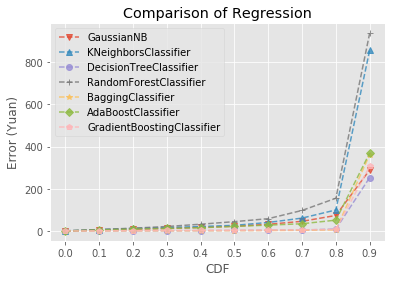

In [515]:
plt.style.use('ggplot')
#model_error['Gradient-Boosting'] = np.zeros(10)
markers = ['v', '^', 'o', '+', '*', 'D', 'p']

xticks = np.arange(0, 1, 1 / 10)
plt.xticks(xticks)
for clf_name, marker in zip(error_dict.keys(), markers):
    plt.plot(xticks, error_dict[clf_name],
             linestyle='--', marker=marker, alpha=0.8)
    
plt.title('Comparison of Regression')
plt.xlabel('CDF')
plt.ylabel('Error (Yuan)')
plt.legend(models.keys())
plt.savefig('regression_comparison.png')

In [516]:
pred_head, pred_X = construct_amt_X_Y(3, ['vipno'], pred_data_X)

Feature names are:  ['num_U_0', 'amt_U_0', 'days_U_0']
The DataFrame's row number is : 430
                   vipno num_U_0 amt_U_0 days_U_0
1            13325038116      17    1514        9
429  6227002180921663895      14     109        3
Feature names are:  ['prod_U_I_0']
The DataFrame's row number is : 430
                   vipno prod_U_I_0
1            13325038116         13
429  6227002180921663895         12
Feature names are:  ['prod_U_B_0']
The DataFrame's row number is : 430
                   vipno prod_U_B_0
1            13325038116          8
429  6227002180921663895          3
Feature names are:  ['prod_U_C_0']
The DataFrame's row number is : 430
                   vipno prod_U_C_0
1            13325038116         11
429  6227002180921663895         11
2
4
month: 2
Feature names are:  ['num_U_1', 'amt_U_1', 'days_U_1']
The DataFrame's row number is : 318
                   vipno num_U_1 amt_U_1 days_U_1
1          1590120718170       2      11        1
317  6227002180921